In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load Iris dataset
iris = load_iris()
data = iris.data
labels_true = iris.target  # For evaluation, though not used in unsupervised learning

In [3]:
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
# Exploratory Data Analysis
import seaborn as sns

# Create a DataFrame for EDA
df = pd.DataFrame(data, columns=iris.feature_names)
df['species'] = iris.target
species_mapping = {i: species for i, species in enumerate(iris.target_names)}
df['species'] = df['species'].map(species_mapping)

In [5]:
# Summary statistics
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


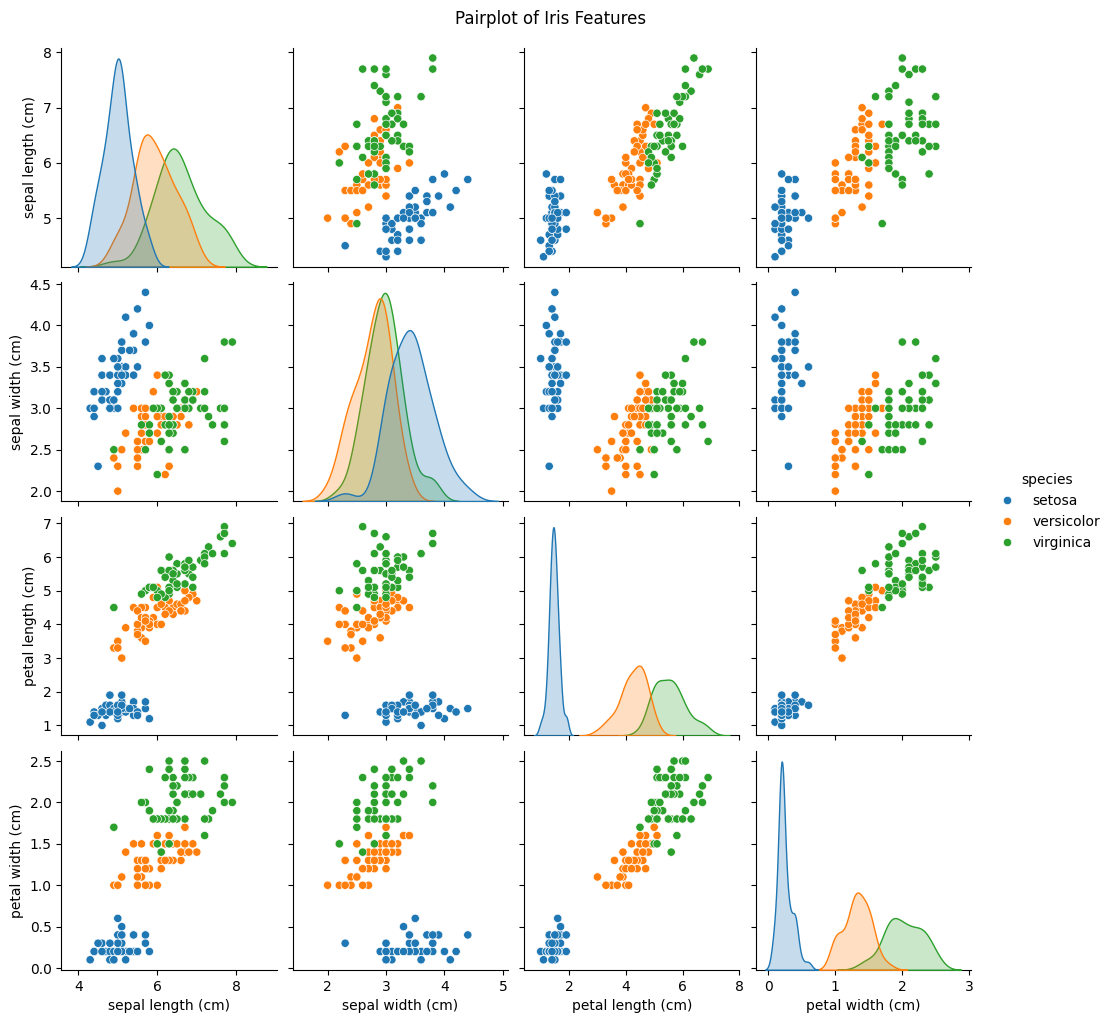

In [7]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

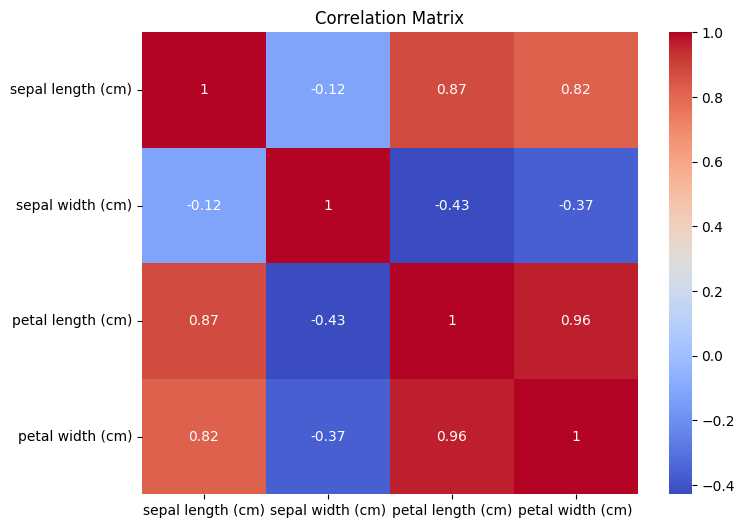

In [12]:
numeric_df = df.drop(columns=['species'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Hierarchical Clustering
hierarchy = linkage(data_scaled, method='ward')
hierarchical_labels = fcluster(hierarchy, t=3, criterion='maxclust')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [15]:
# Reduce dimensions for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

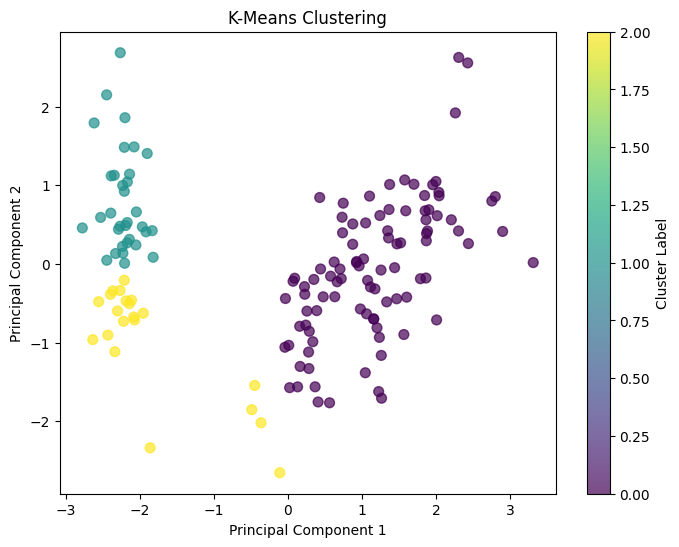

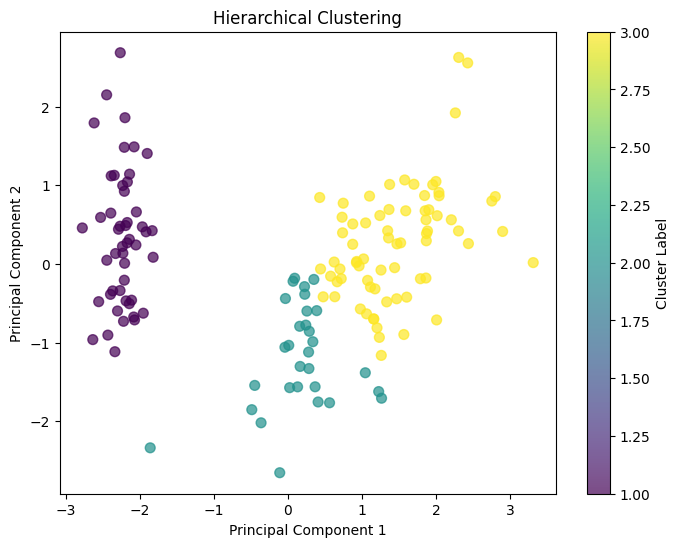

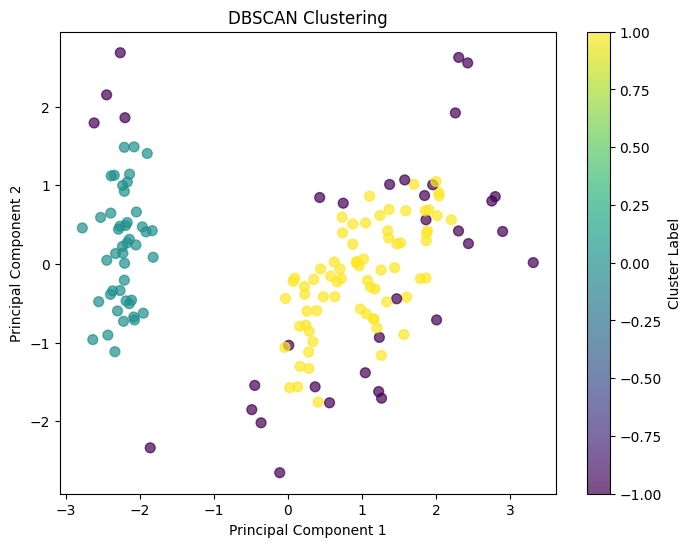

In [16]:
# Helper function for plotting
def plot_clusters(data_2d, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Visualize results
plot_clusters(data_pca, kmeans_labels, "K-Means Clustering")
plot_clusters(data_pca, hierarchical_labels, "Hierarchical Clustering")
plot_clusters(data_pca, dbscan_labels, "DBSCAN Clustering")

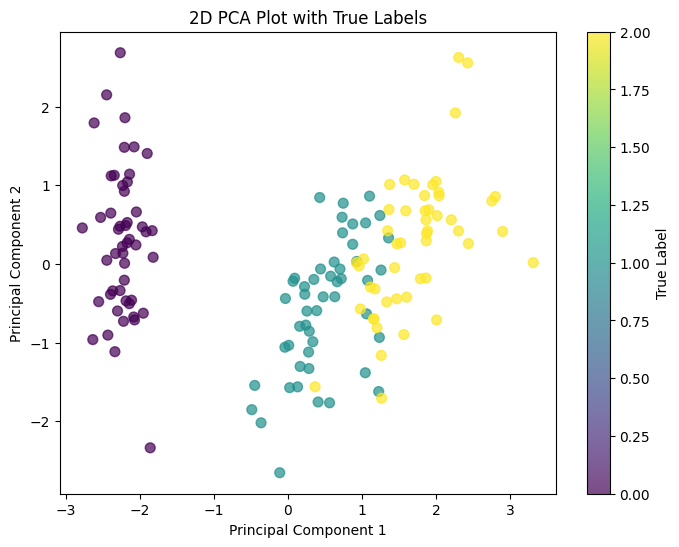

In [21]:
# PCA with 2 components
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

# Plot the 2D PCA results with true labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=iris.target, cmap='viridis', s=50, alpha=0.7)
plt.title("2D PCA Plot with True Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='True Label')
plt.show()


In [17]:
from mpl_toolkits.mplot3d import Axes3D

# PCA with 3 components
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_scaled)

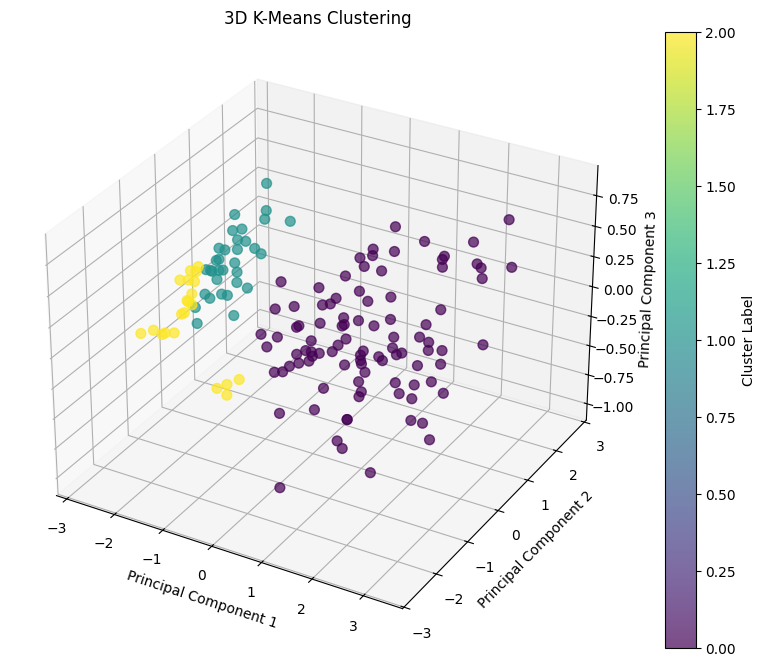

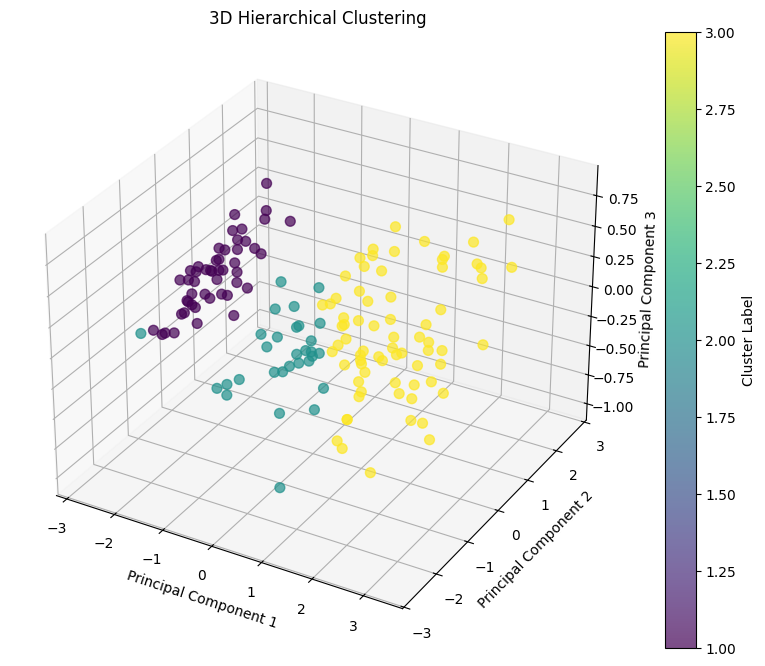

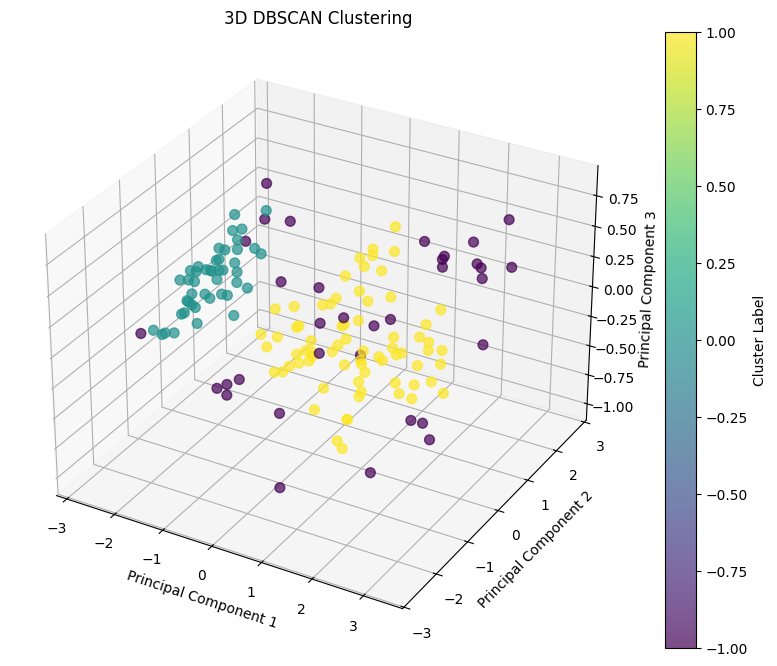

In [18]:
def plot_3d_clusters(data_3d, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], 
                          c=labels, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

# Visualize each clustering algorithm
plot_3d_clusters(data_pca_3d, kmeans_labels, "3D K-Means Clustering")
plot_3d_clusters(data_pca_3d, hierarchical_labels, "3D Hierarchical Clustering")
plot_3d_clusters(data_pca_3d, dbscan_labels, "3D DBSCAN Clustering")

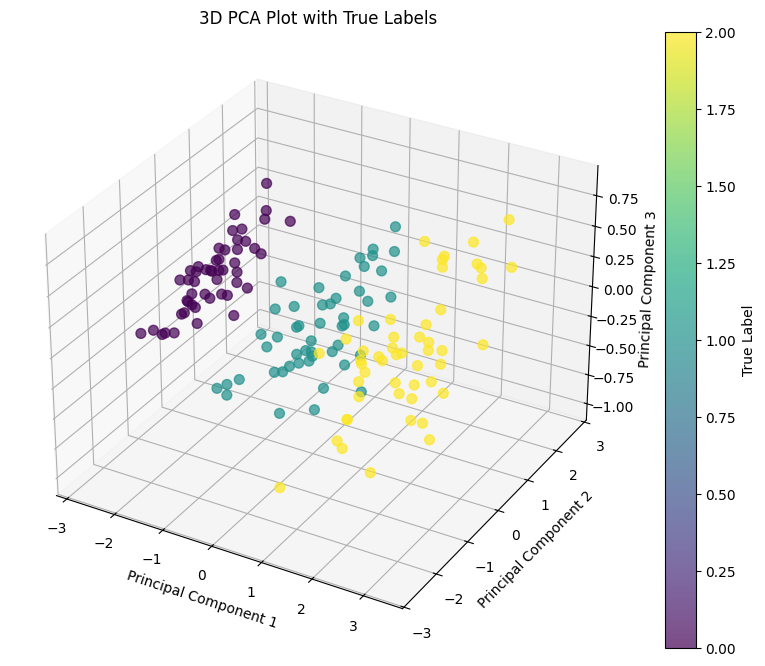

In [22]:
# PCA with 3 components
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_scaled)

# Plot the 3D PCA results with true labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], 
                      c=iris.target, cmap='viridis', s=50, alpha=0.7)
ax.set_title("3D PCA Plot with True Labels")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter, label='True Label')
plt.show()


In [20]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Evaluate with adjusted Rand index
print("K-Means ARI:", adjusted_rand_score(labels_true, kmeans_labels))
print("Hierarchical ARI:", adjusted_rand_score(labels_true, hierarchical_labels))
print("DBSCAN ARI:", adjusted_rand_score(labels_true, dbscan_labels))

# Evaluate with silhouette score
print("K-Means Silhouette Score:", silhouette_score(data_scaled, kmeans_labels))
print("Hierarchical Silhouette Score:", silhouette_score(data_scaled, hierarchical_labels))
# DBSCAN silhouette score (-1 for noisy points ignored)
print("DBSCAN Silhouette Score:", silhouette_score(data_scaled, dbscan_labels))

K-Means ARI: 0.432804702527474
Hierarchical ARI: 0.6153229932145449
DBSCAN ARI: 0.4420986685885924
K-Means Silhouette Score: 0.4798814508199817
Hierarchical Silhouette Score: 0.4466890410285909
DBSCAN Silhouette Score: 0.35651648142700726
